 in this project we want to classify Electrical Grid Stability into two groups stable or unstable.4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept. we will use two algorithms to figure out which one has higher accuracy in classifing of this dataset. algorithms which we will use : LogisticRegression and Naive_bayes.

# importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#  reading dataset and obtaining some information about it

In [4]:
data_set=pd.read_csv("Data_for_UCI_named.csv")
data_set.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [19]:
data_set.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
mycopy1=data_set.copy()

# converting categorical variable into numerical variable

 0 would be stable label and 1 would be unstable label

In [7]:
encoder=LabelEncoder()
encoder.fit(["unstable","stable"])
mycopy1.iloc[:,13]=encoder.transform(mycopy1.iloc[:,13])

In [8]:
mycopy1.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


# finding correlation between feature

In [20]:
corr=mycopy1.corr()
corr["stabf"].sort_values(ascending=False)

stabf    1.000000
stab     0.826959
tau2     0.246280
tau4     0.239375
tau3     0.237492
tau1     0.234898
g3       0.231774
g2       0.217341
g4       0.204931
g1       0.197664
p1       0.009938
p2       0.006173
p3      -0.000649
p4      -0.022785
Name: stabf, dtype: float64

# train_test_split

In [34]:
X1=mycopy1[["tau1","tau2","tau3","tau4","g3","stab","g2","g4","g1"]].values
Y1=mycopy1["stabf"].values

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.3,random_state=5)

# LogisticRegression

 in LogisticRegression we used penalty="l2" for avoiding from overfitting.so we can have more accurate prediction

In [36]:
model1=LogisticRegression(penalty="l2")
myfit1=model1.fit(x_train,y_train)

In [37]:
pred1=model1.predict(x_test)

In [38]:
score=f1_score(y_test,pred1)
print(f"F1-SCORE : {score}")

F1-SCORE : 0.9143730886850152


 in this confusion_matrix we can see how many labels we  predicited correctly

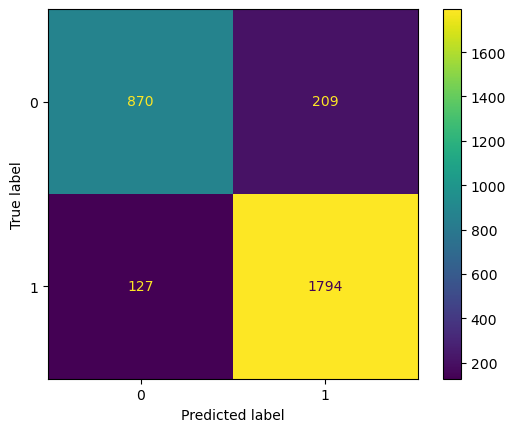

In [39]:
con1=confusion_matrix(y_test,pred1,labels=myfit1.classes_)
CM1=ConfusionMatrixDisplay(con1,display_labels=myfit1.classes_)
CM1.plot()
plt.show()

# Naive_bayes

Naive_bayes classifies based on bayes probability theory

In [40]:
model2=GaussianNB()
myfit2=model2.fit(x_train,y_train)

In [41]:
pred2=model2.predict(x_test)

In [42]:
score=f1_score(y_test,pred2)
print(f"F1-SCORE : {score}")

F1-SCORE : 0.982529335071708


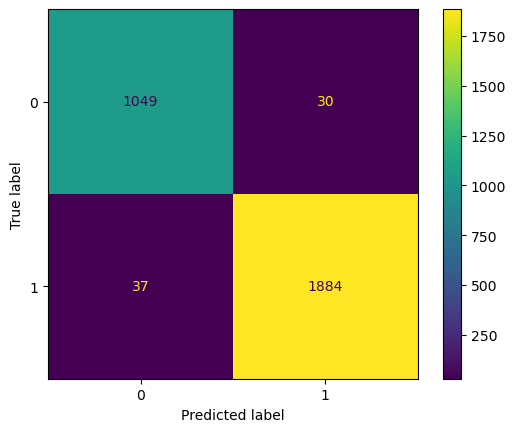

In [43]:
con1=confusion_matrix(y_test,pred2,labels=myfit1.classes_)
CM1=ConfusionMatrixDisplay(con1,display_labels=myfit1.classes_)
CM1.plot()
plt.show()

as you can see the Naive_bayes had higher accuracy in predicting and classifing our dataset.